Step 1: Import necessary libraries. We will need os to import data from the drive, Scikit Learn for analysis and matplotlib and wordvector for visualization

In [3]:
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud


*   TfidfVectorizer- Turns words into vectors (read: [tf–idf](https://https://en.wikipedia.org/wiki/Tf%E2%80%93idf) )
*   Cosine similarity- Measure the angle (similarity) between two vectors: 1 indicates perfect similairy, -1 indicates perfect dissimilarity and 0 means no similarity.








Step 2: Load and print the documents

In [17]:
dir = "/content/Data/"
files_students = [os.path.join(dir, doc) for doc in os.listdir(dir) if doc.endswith('.txt')]
docs_students = [open(doc, 'r').read() for doc in files_students]

for file, doc in zip(files_students, docs_students):
  print(f"File : {file}")
  print("Content: ")
  print(doc)
  print("-"*50)

File : /content/Data/file_1.txt
Content: 
Artificial Intelligence/Machine Learning (AI/ML) SME
Lorton, VA


Overview:
Systems Planning and Analysis, Inc. (SPA) delivers high-impact, technical solutions to complex national security issues. With over 50 years of business expertise and consistent growth, we are known for continuous innovation for our government customers, in both the US and abroad. Our exceptionally talented team is highly collaborative in spirit and practice, producing Results that Matter. Come work with the best! We offer opportunity, unique challenges, and clear-sighted commitment to the mission. SPA: Objective. Responsive. Trusted.

The Joint, Office of the Secretary of Defense, Interagency Division provides expert support services to a range of customers spanning across the Department of Defense, Federal Civilian, and international markets. JOID provides a diverse portfolio of analytical and programmatic capabilities to help our customers make informed decisions on t

Step 3: Create a function with TfidfVectorizer to create vectors from a list of documents

In [18]:
def create_vectors(docs):
  return TfidfVectorizer().fit_transform(docs).toarray()

Step 4: Create a function to calculate cosine similary between two vectors

In [19]:
def cos_sim(vector1, vector2):
  return cosine_similarity([vector1, vector2])

Step 5: Create document vector pairs

In [20]:
doc_vec = create_vectors(docs_students)
doc_file_pairs = list(zip(files_students, doc_vec))

Step 6: Create a function that detects plagarism

In [23]:
def check_plag():
  plag_res = set()

  global doc_file_pairs

  for file1, vec1 in doc_file_pairs:
    remaining_pairs = doc_file_pairs.copy()
    current_idx = remaining_pairs.index((file1, vec1))

    del remaining_pairs[current_idx]

    for file2, vec2 in remaining_pairs:
      sim_score = cos_sim(vec1, vec2)[0][1]

      sorted_filenames = sorted((file1, file2))
      res = (sorted_filenames[0], sorted_filenames[1], round(sim_score, 2))
      plag_res.add(res)

  return plag_res

Printing plagarism results

In [26]:
plagarism_results = check_plag()
for res in plagarism_results:
  print(res)

('/content/Data/file_2.txt', '/content/Data/file_3.txt', 0.36)
('/content/Data/file_1.txt', '/content/Data/file_3.txt', 0.6)
('/content/Data/file_1.txt', '/content/Data/file_2.txt', 0.32)


Wordcloud visualization

Step 7: Creating a function for wordcloud visualization

In [29]:
def gen_cloud(doc_text, filename):
  wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(doc_text)

  plt.figure(figsize = (10, 8))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.title(f"{filename} Wordcloud")
  plt.axis('off')
  plt.show()


Plot a document that has a cosine similary greater than or equal 0.5

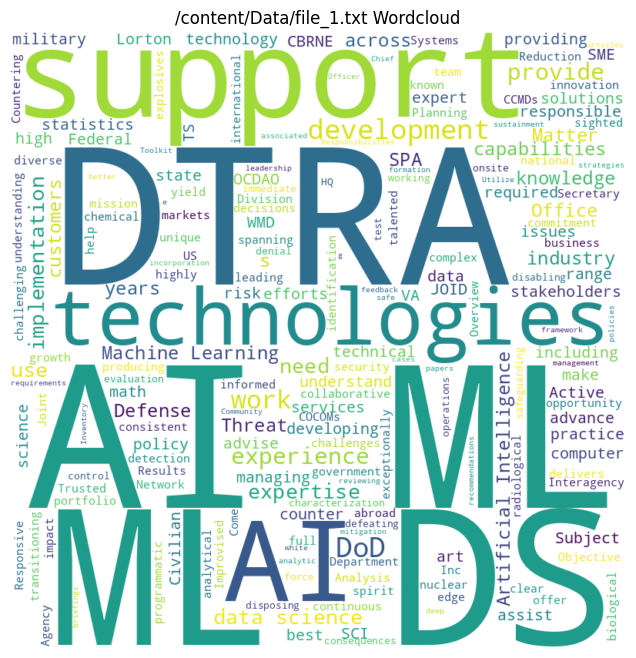

In [30]:
for res in plagarism_results:
  if res[2] >=0.5:
    gen_cloud(open(res[0]).read(),res[0])

Plot wordcloud of a document

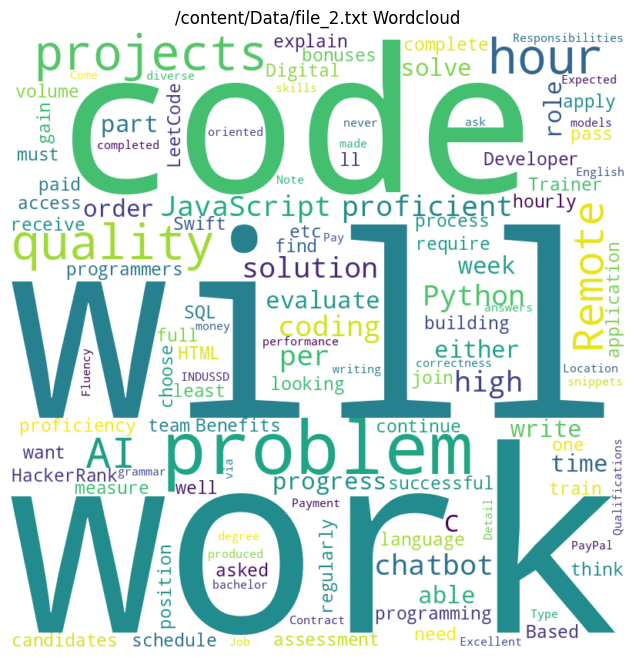

In [32]:
doc_to_print = "/content/Data/file_2.txt"

for filename, doc in doc_file_pairs:
  if filename == doc_to_print:
    gen_cloud(open(filename).read(), filename)